In [10]:
import matplotlib.pyplot as plt
from pythae.models import AutoModel
from torchvision import datasets

In [17]:
trained_model = AutoModel.load_from_folder("./experiments/CLEPS/2024-04-23_15-28-37/RHVAE_training_2024-04-23_15-29-15/final_model") # RHAVE
#trained_model = AutoModel.load_from_folder("./experiments/CLEPS/VAE_training_2024-04-23_15-18-37/final_model") # VAE


In [18]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
eval_dataset = mnist_trainset.data.reshape(-1, 1, 28, 28) / 255.

reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

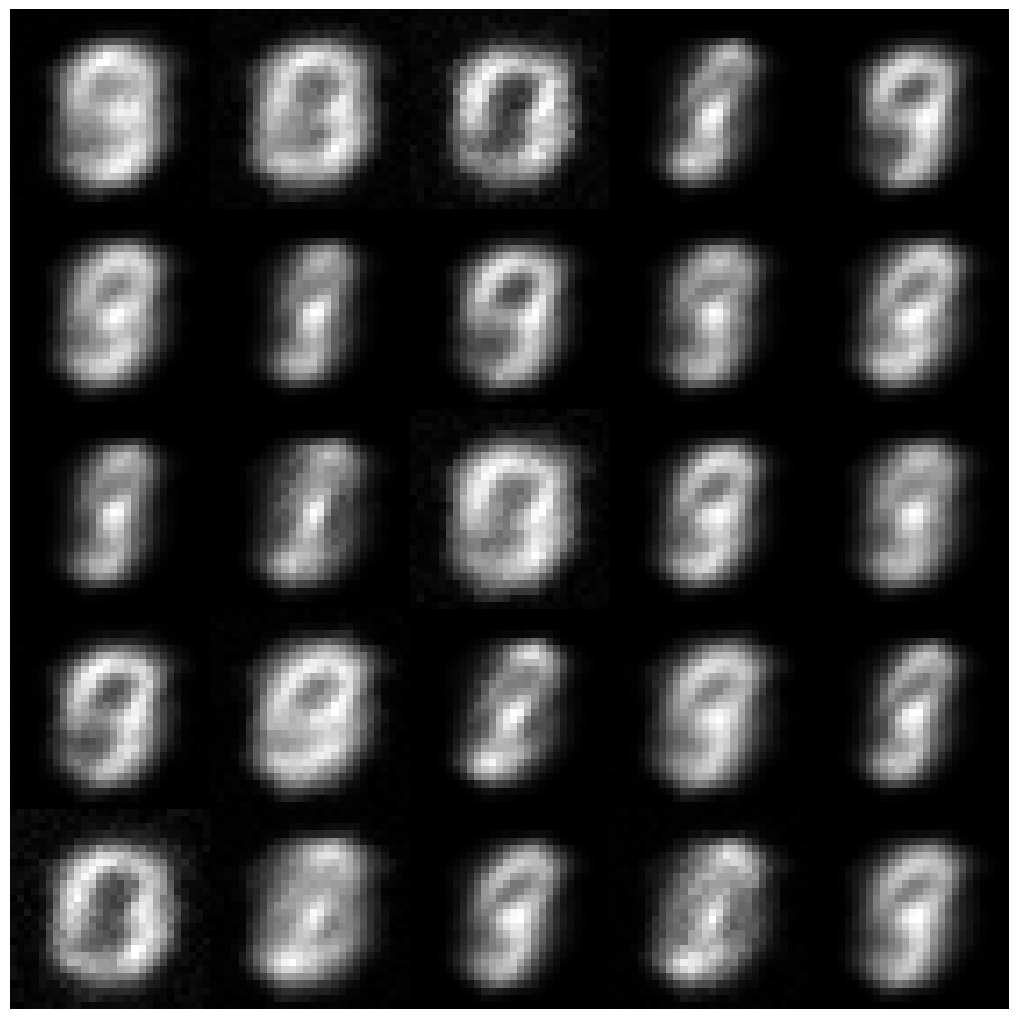

In [19]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
nterpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()